This notebook will be used to make sure that the functions in the ellipse.py module are working properly.

In [1]:
import os
import datetime
import matplotlib.pylab as plt
from matplotlib.patches import Ellipse
import numpy as np
from IPython.display import display, Math, Latex
import csv
import pandas as pd
import seaborn as sns
from dateutil import tz
from scipy.optimize import curve_fit
import collections

import netCDF4 as nc
from salishsea_tools import (viz_tools, tidetools as tt, ellipse, nc_tools)
from salishsea_tools.nowcast import (analyze, research_VENUS)


%matplotlib inline

In [2]:
path = '/data/dlatorne/MEOPAR/SalishSea/nowcast/'

to=datetime.datetime(2015,4,26)
tf=datetime.datetime(2015,7,19)

i = [280]
j = [400]

In [3]:
params, dep = ellipse.get_params_nowcast(to, tf, i, j, path, 4, depthrange=1, depav=False)
print params['M2']['Phase'], params['K1']['Semi-Major Axis'], 

[[ 284.56665314]] [[ 0.10696453]]


In [4]:
params, dep = ellipse.get_params_nowcast(to, tf, i, j, path, 6, depthrange=1, depav=False)
print params['M2']['Phase'], params['P1']['Semi-Major Axis']

[[ 284.29853224]] [[ 0.04444189]]


In [5]:
params, dep = ellipse.get_params_nowcast(to, tf, i, j, path, 8, depthrange=1, depav=False)
print params['M2']['Phase'], params['P1']['Semi-Major Axis']

[[ 284.20263301]] [[ 0.04515197]]


##Compare @ ONC node values 

Loading model values that I have previous calculated using a 2 constituents analysis.

In [6]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 7, 13)

t_o = to.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()

runname1 = '{}_{}_Central_depav'.format(t_o, t_f)
runname2 = '{}_{}_East_depav'.format(t_o, t_f)

#Only importing M2 parameters
cols=np.arange(0,1)

df1 = pd.read_csv('TidalEllipseData/Nodes/'+runname1+'.csv', index_col=False) 
df2 = pd.read_csv('TidalEllipseData/Nodes/'+runname2+'.csv', index_col=False)

cen_av = df1.as_matrix()
east_av = df2.as_matrix()

In [7]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 7, 13)

t_o = to.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()

runname1 = '{}_{}_Central'.format(t_o, t_f)
runname2 = '{}_{}_East'.format(t_o, t_f)


cols=np.arange(0,9)

df1 = pd.read_csv('TidalEllipseData/Nodes/'+runname1+'.csv', usecols=cols) 
df2 = pd.read_csv('TidalEllipseData/Nodes/'+runname2+'.csv', usecols=cols)

cen = df1.as_matrix()
east = df2.as_matrix()

The values from Mark Halverson.

In [8]:
node = [[0.177, 0.006, 109, 311, 0.106, 0.007, 112, 188],[ 0.262, -0.005, 125, 320, 0.175, -0.011, 122, 220]]
#CODAR values
codar = [[0.113, 0.008, 126, 273,0.074, 0.006, 134, 131],[0.138, -0.037, 134, 282, 0.077, -0.009, 129, 187]]

In [9]:
print "          Major-Axis   Minor-Axis     Angle       Phase"
print "            (m/s)        (m/s)     (deg ccw E)    (deg)"  
print "M2 - Central (35-290m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen_av[0,0], cen_av[0,1], cen_av[0,2], cen_av[0,3]) 
print ' Nodes      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         node[0][0], node[0][1], node[0][2], node[0][3])
print ""
print "M2 - East (20-160m)"
print ' Model      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f}  '.format( 
         east_av[0,0], east_av[0,1], east_av[0,2], east_av[0,3]) 
print ' Nodes      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         node[1][0], node[1][1], node[1][2], node[1][3])
print ""
print "K1 - Central (35-290m)"
print ' Model      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen_av[0,4], cen_av[0,5], cen_av[0,6], cen_av[0,7]) 
print ' Nodes      {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         node[0][4], node[0][5], node[0][6], node[0][7])
print ""
print "K1 - East (20-160m)"
print ' Model      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f}  '.format( 
         east_av[0,4], east_av[0,5], east_av[0,6], east_av[0,7]) 
print ' Nodes      {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         node[1][4], node[1][5], node[1][6], node[1][7])

          Major-Axis   Minor-Axis     Angle       Phase
            (m/s)        (m/s)     (deg ccw E)    (deg)
M2 - Central (35-290m)
 Model      0.17         0.014        130          305  
 Nodes      0.18         0.006        109          311 

M2 - East (20-160m)
 Model      0.31        -0.018        137          324  
 Nodes      0.26        -0.005        125          320 

K1 - Central (35-290m)
 Model      0.07         0.004        135          184  
 Nodes      0.11         0.007        112          188 

K1 - East (20-160m)
 Model      0.15        -0.020        131          226  
 Nodes      0.17        -0.011        122          220 


#East

I will use the same date range, the same grid cells and the same depth averaging cells.

In [10]:
to = datetime.datetime(2014,11,26)
tf = datetime.datetime(2015, 7, 13)

ie = [283]
je = [416]

In [11]:
parame, dep = ellipse.get_params_nowcast(to, tf, ie, je, path, 2, depthrange=[20, 160], depav=True)
parame4, dep = ellipse.get_params_nowcast(to, tf, ie, je, path, 4, depthrange=[20, 160], depav=True)
parame6, dep = ellipse.get_params_nowcast(to, tf, ie, je, path, 6, depthrange=[20, 160], depav=True)

In [26]:
print "            Major-Axis   Minor-Axis     Angle       Phase"
print "              (m/s)        (m/s)     (deg ccw E)    (deg)"  
print "M2 - East (20-160m)"
print ' Observation  {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         node[1][0], node[1][1], node[1][2], node[1][3])
print ' Model        {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         east_av[0,0], east_av[0,1], east_av[0,2], east_av[0,3]) 
print ' 2 consts     {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f}  '.format( 
         parame['M2']['Semi-Major Axis'][0,0], parame['M2']['Semi-Minor Axis'][0,0], parame['M2']['Inclination'][0,0], parame['M2']['Phase'][0,0]) 
print ' 4 consts     {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         parame4['M2']['Semi-Major Axis'][0,0], parame4['M2']['Semi-Minor Axis'][0,0], parame4['M2']['Inclination'][0,0], parame4['M2']['Phase'][0,0])
print ' 6 consts     {0:.2f}        {1:5.3f}        {2:.0f}          {3:.0f} '.format(
         parame6['M2']['Semi-Major Axis'][0,0], parame6['M2']['Semi-Minor Axis'][0,0], parame6['M2']['Inclination'][0,0], parame6['M2']['Phase'][0,0])

            Major-Axis   Minor-Axis     Angle       Phase
              (m/s)        (m/s)     (deg ccw E)    (deg)
M2 - East (20-160m)
 Observation  0.26        -0.005        125          320 
 Model        0.31        -0.018        137          324  
 2 consts     0.31        -0.018        137          324  
 4 consts     0.31        -0.018        137          324 
 6 consts     0.31        -0.018        137          324 


##Central

In [27]:
ic = [266]
jc = [424]

In [ ]:
paramc, dep = ellipse.get_params_nowcast(to, tf, ic, jc, path, 2, depthrange=[35, 300], depav=True)
paramc4, dep = ellipse.get_params_nowcast(to, tf, ic, jc, path, 4, depthrange=[35, 300], depav=True)
paramc6, dep = ellipse.get_params_nowcast(to, tf, ic, jc, path, 6, depthrange=[35, 300], depav=True)

In [35]:
print "            Major-Axis   Minor-Axis     Angle       Phase"
print "              (m/s)        (m/s)     (deg ccw E)    (deg)"  
print "K1 - Central (35-290m)"
print ' Observations {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         node[0][4], node[0][5], node[0][6], node[0][7])
print ' Model        {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         cen_av[0,4], cen_av[0,5], cen_av[0,6], cen_av[0,7]) 
print ' 2 consts     {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f}  '.format( 
         paramc['K1']['Semi-Major Axis'][0,0], paramc['K1']['Semi-Minor Axis'][0,0], paramc['K1']['Inclination'][0,0], paramc['K1']['Phase'][0,0]) 
print ' 4 consts     {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         paramc4['K1']['Semi-Major Axis'][0,0], paramc4['K1']['Semi-Minor Axis'][0,0], paramc4['K1']['Inclination'][0,0], paramc4['K1']['Phase'][0,0])
print ' 6 consts     {0:.2f}        {1:6.3f}        {2:.0f}          {3:.0f} '.format(
         paramc6['K1']['Semi-Major Axis'][0,0], paramc6['K1']['Semi-Minor Axis'][0,0], paramc6['K1']['Inclination'][0,0], paramc6['K1']['Phase'][0,0])

            Major-Axis   Minor-Axis     Angle       Phase
              (m/s)        (m/s)     (deg ccw E)    (deg)
K1 - Central (35-290m)
 Observations 0.11         0.007        112          188 
 Model        0.07         0.004        135          184  
 2 consts     0.07         0.004        135          184  
 4 consts     0.07         0.004        135          184 
 6 consts     0.06         0.004        135          184 


##Is it something wierd with the depth profile?

In [ ]:
paramc_dep, dep = ellipse.get_params_nowcast(to, tf, ic, jc, path, 2, depthrange='None', depav=False)
print 'done'
paramc4_dep, dep = ellipse.get_params_nowcast(to, tf, ic, jc, path, 4, depthrange='None', depav=False)
print 'done'
paramc6_dep, dep = ellipse.get_params_nowcast(to, tf, ic, jc, path, 6, depthrange='None', depav=False)

In [31]:
count = np.arange(0,2)
parameter = ['Semi-Major Axis', 'Semi-Minor Axis', 'Inclination', 'Phase']
unit = ['m/s','m/s','deg', 'deg']

In [32]:
eastobs = np.loadtxt('/ocean/mhalvers/research/adcp/east_ADCP_M2_ellipse_params.txt', skiprows=2, unpack=True)
central = np.loadtxt('/ocean/mhalvers/research/adcp/central_ADCP_M2_ellipse_params.txt', skiprows=2, unpack=True)
central[1:3,:] = central[1:3,:]/100
eastobs[1:3,:] = eastobs[1:3,:]/100

In [33]:
font = {'family' : 'Arial',
    'weight' : 'normal',
    'size'   : 20}
axisfont = {'family' : 'Arial',
    'weight' : 'light',
    'size'   : 16}
sns.set_style('darkgrid')

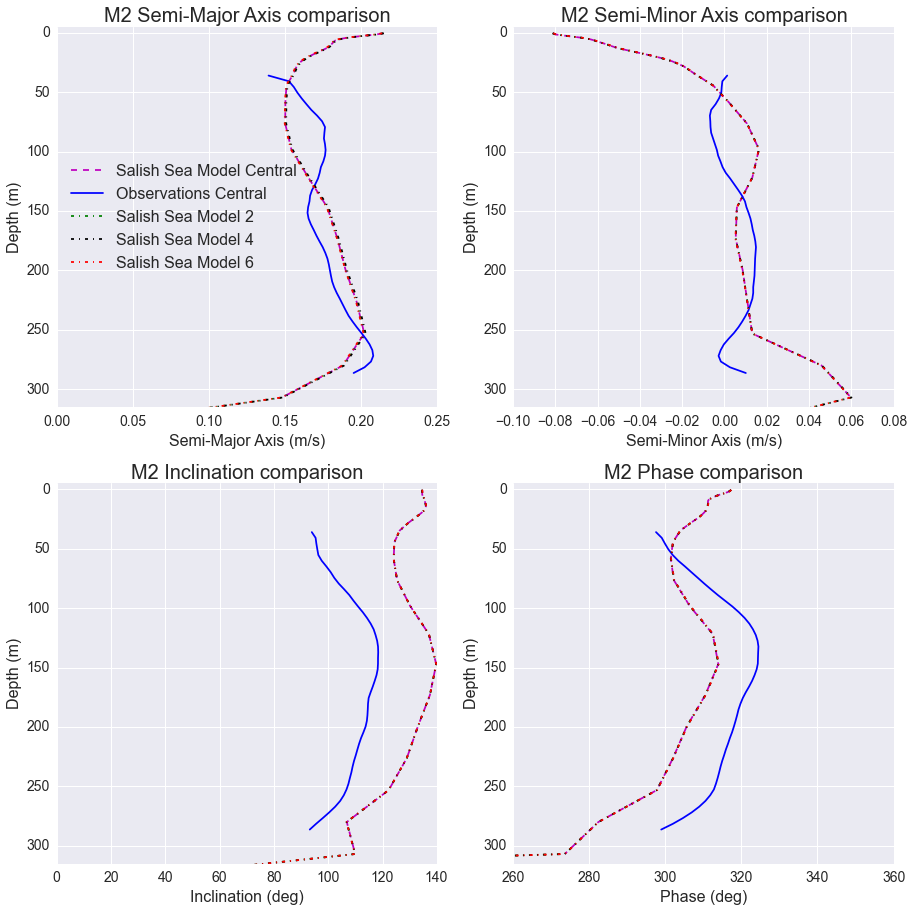

In [34]:
fig, ([ax0, ax1],[ ax2, ax3])= plt.subplots(2,2,figsize=(15,15))

for ax , ind, par, u in zip([ax0, ax1, ax2, ax3], np.arange(1,5), parameter, unit):
    if ax ==ax3:
        ax.plot(cen[:-4,ind],cen[:-4,0], '--m', label='Salish Sea Model Central')
        ax.plot(central[ind,:],central[0,:], '-b', label='Observations Central')
        ax.plot(paramc_dep['M2'][par][:,0,0], dep[:], '-.g', label='Salish Sea Model 2')
        ax.plot(paramc4_dep['M2'][par][:,0,0], dep[:], '-.k', label='Salish Sea Model 4')
        ax.plot(paramc6_dep['M2'][par][:,0,0], dep[:], '-.r', label='Salish Sea Model 6')
        ax.set_xlim([260, 360])
        ax.tick_params(axis='both', which='major', labelsize=14)
    else:
        ax.plot(cen[:-4,ind],cen[:-4,0], '--m', label='Salish Sea Model Central')
        ax.plot(central[ind,:],central[0,:], '-b', label='Observations Central')
        ax.plot(paramc_dep['M2'][par][:,0,0], dep[:], '-.g', label='Salish Sea Model 2')
        ax.plot(paramc4_dep['M2'][par][:,0,0], dep[:], '-.k', label='Salish Sea Model 4')
        ax.plot(paramc6_dep['M2'][par][:,0,0], dep[:], '-.r', label='Salish Sea Model 6')
        ax.tick_params(axis='both', which='major', labelsize=14)

    ax.set_title('M2 {} comparison'.format(par), **font)
    ax.set_ylabel('Depth (m)',**axisfont)
    ax.set_xlabel('{} ({})'.format(par,u),**axisfont)
    ax.set_ylim([-5, 315])
    ax.invert_yaxis()
    
ax0.legend(loc=0, fontsize=16)